In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install kneed
from kneed import KneeLocator
import seaborn as sns

In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score

In [186]:
# load dataset and show the first five sample
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/customer_classification_data.csv"
df = pd.read_csv(url)
df.head()

,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity
0,66161.01279,57,Bachelor,503,1,41,1968.919899,2517.159284,5813.342700,0.975409,1,0.202693
1,78639.20248,60,High School,779,2,27,9797.056371,31501.758840,3991.007637,0.945920,2,0.549358
2,70207.25321,46,High School,519,14,95,7024.173403,16444.341580,6036.140567,0.272664,3,0.842993
3,65866.23872,42,High School,834,17,77,7992.359261,45233.592940,2691.192862,0.814385,4,0.119473
4,56774.10995,36,Bachelor,410,12,58,538.691042,48586.582480,10144.073090,0.346523,4,0.990168


In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Income                 500 non-null    float64
 1   Age                    500 non-null    int64  
 2   Education              500 non-null    object 
 3   Credit_Score           500 non-null    int64  
 4   Years_with_Bank        500 non-null    int64  
 5   Transaction_Count      500 non-null    int64  
 6   Balance                500 non-null    float64
 7   Loan_Approval_Amount   500 non-null    float64
 8   Credit_Card_Limit      500 non-null    float64
 9   Purchase_Frequency     500 non-null    float64
 10  Customer_Satisfaction  500 non-null    int64  
 11  Online_Activity        500 non-null    float64
dtypes: float64(6), int64(5), object(1)
memory usage: 47.0+ KB


In [188]:
df.describe()

,Income,Age,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,62244.823110,40.010000,564.992000,10.806000,48.486000,5062.825191,25395.518396,10609.972452,0.512753,2.564000,0.494516
std,21881.731581,13.051229,159.206663,5.151061,28.742339,2926.414765,14257.083307,5572.250431,0.282915,1.101058,0.294468
min,25352.160710,18.000000,300.000000,1.000000,1.000000,44.900440,1087.318821,1017.345471,0.000813,1.000000,0.001320
25%,43586.942127,29.000000,426.000000,7.000000,25.000000,2563.861164,13254.375542,5788.708258,0.272196,2.000000,0.239926
50%,61513.145375,39.000000,562.000000,11.000000,48.000000,4962.940262,25523.286385,10716.457885,0.531370,3.000000,0.485326
75%,79805.933200,51.000000,692.000000,15.000000,72.000000,7575.192218,38359.706343,15530.730127,0.763411,4.000000,0.759197
max,99913.525490,64.000000,849.000000,19.000000,99.000000,9984.440444,49971.895230,19968.520560,0.993942,4.000000,0.999897


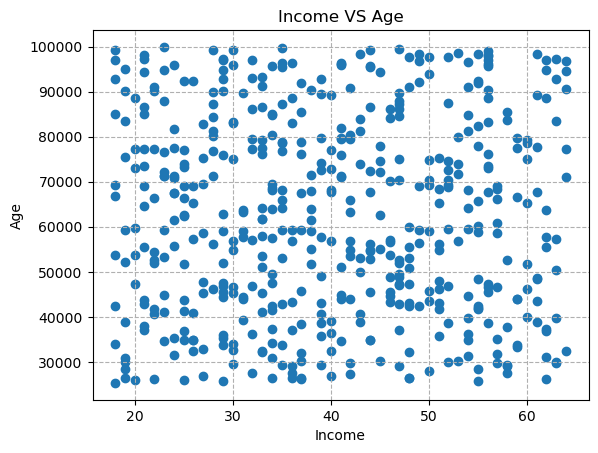

In [189]:
plt.scatter(df['Age'], df['Income'])
plt.title('Income VS Age')
plt.xlabel('Income')
plt.ylabel('Age')
plt.grid(axis='both', linestyle='--')
plt.show()

Persebaran data nya cukup merata. Umur lebih tua tidak menjamin income lebih banyak, umur muda juga tidak pasti income sedikit. Karena ada yang umur 20 tapi income sebesar 100000, umur 60 juga ada hanya 30000

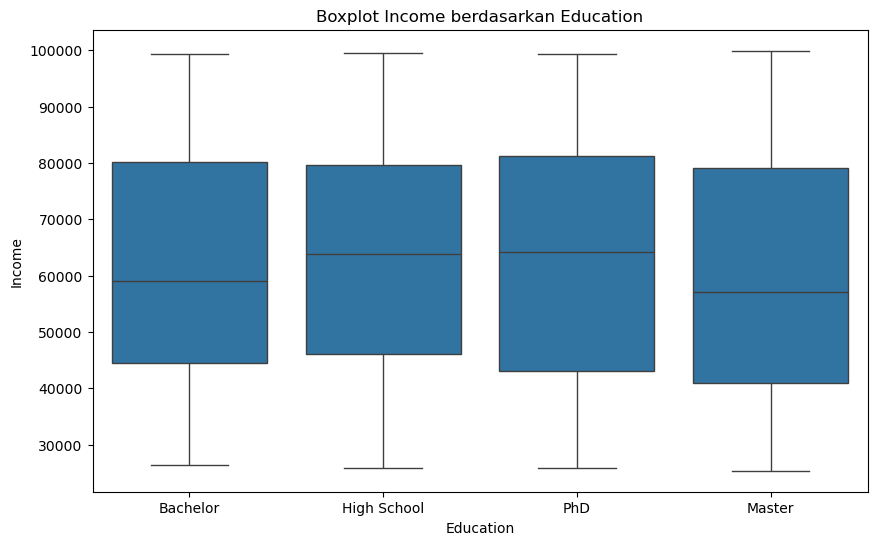

In [190]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Education', y='Income', data=df)
plt.title("Boxplot Income berdasarkan Education")
plt.show()


boxplot income berdasarkan education untuk melihat outliet dan sebaran data. Pada data ini tidak ada outlier dan sebaran nya cukup merata setiap kategori education

In [191]:
# Encoding Gender
le = LabelEncoder()
df['Education'] = le.fit_transform(df['Education'])
df.head()

,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity
0,66161.01279,57,0,503,1,41,1968.919899,2517.159284,5813.342700,0.975409,1,0.202693
1,78639.20248,60,1,779,2,27,9797.056371,31501.758840,3991.007637,0.945920,2,0.549358
2,70207.25321,46,1,519,14,95,7024.173403,16444.341580,6036.140567,0.272664,3,0.842993
3,65866.23872,42,1,834,17,77,7992.359261,45233.592940,2691.192862,0.814385,4,0.119473
4,56774.10995,36,0,410,12,58,538.691042,48586.582480,10144.073090,0.346523,4,0.990168


In [207]:
# Menampilkan urutan kategori asli yang di-encode
print(le.classes_)


['Bachelor' 'High School' 'Master' 'PhD']


# SCALED

In [192]:
# create new dataframe that consist only annual income and spending score
df_scaled = df[['Income', 'Age', 'Education', 'Credit_Score', 'Years_with_Bank', 'Transaction_Count', 'Balance', 'Loan_Approval_Amount', 'Credit_Card_Limit', 'Purchase_Frequency', 'Customer_Satisfaction', 'Online_Activity']]
df_scaled.head()

,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity
0,66161.01279,57,0,503,1,41,1968.919899,2517.159284,5813.342700,0.975409,1,0.202693
1,78639.20248,60,1,779,2,27,9797.056371,31501.758840,3991.007637,0.945920,2,0.549358
2,70207.25321,46,1,519,14,95,7024.173403,16444.341580,6036.140567,0.272664,3,0.842993
3,65866.23872,42,1,834,17,77,7992.359261,45233.592940,2691.192862,0.814385,4,0.119473
4,56774.10995,36,0,410,12,58,538.691042,48586.582480,10144.073090,0.346523,4,0.990168


In [193]:
# scale dataset with standard scaler

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

df_sc_scaled = pd.DataFrame(sc.fit_transform(df_scaled), columns=['Income', 'Age', 'Education', 'Credit_Score', 'Years_with_Bank', 'Transaction_Count', 'Balance', 'Loan_Approval_Amount', 'Credit_Card_Limit', 'Purchase_Frequency', 'Customer_Satisfaction', 'Online_Activity'])

df_sc_scaled.head()


,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity
0,0.179150,1.303097,-1.291519,-0.389771,-1.905592,-0.260713,-1.058293,-1.606308,-0.861669,1.636958,-1.421875,-0.992013
1,0.749977,1.533191,-0.389620,1.345561,-1.711263,-0.748287,1.619378,0.428724,-1.189034,1.532620,-0.512748,0.186427
2,0.364249,0.459420,-0.389620,-0.289172,0.620687,1.619930,0.670893,-0.628469,-0.821645,-0.849476,0.396379,1.184595
3,0.165665,0.152629,-0.389620,1.691370,1.203675,0.993049,1.002068,1.392847,-1.422533,1.067226,1.305506,-1.274907
4,-0.250263,-0.307558,-1.291519,-0.974502,0.232029,0.331341,-1.547513,1.628264,-0.083694,-0.588149,1.305506,1.684898


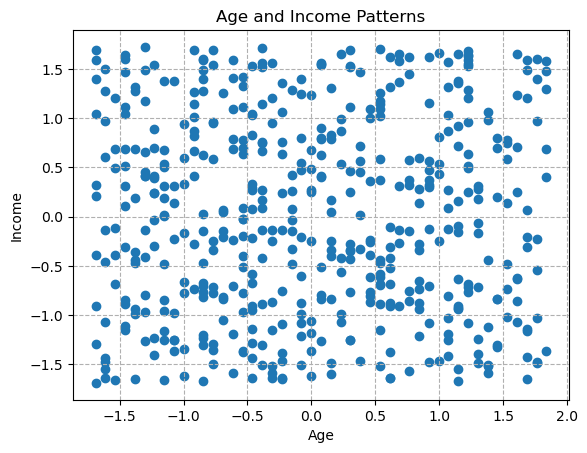

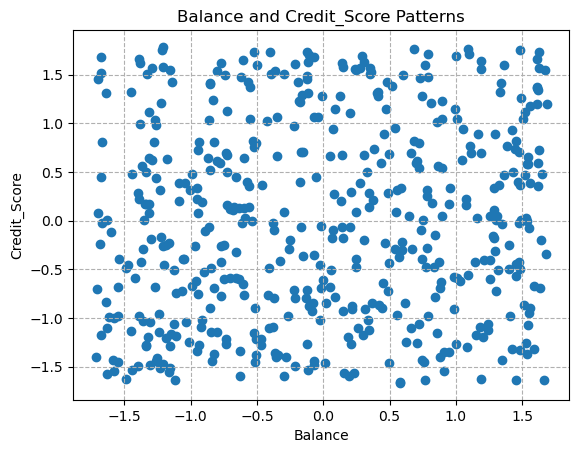

In [202]:
# visualization
plt.scatter(df_sc_scaled["Age"], df_sc_scaled["Income"])
plt.xlabel("Age")
plt.ylabel("Income")
plt.grid(axis='both', linestyle='--')
plt.title("Age and Income Patterns")
plt.show()

plt.scatter(df_sc_scaled["Balance"], df_sc_scaled["Credit_Score"])
plt.xlabel("Balance")
plt.ylabel("Credit_Score")
plt.grid(axis='both', linestyle='--')
plt.title("Balance and Credit_Score Patterns")
plt.show()

persebarannya merata karena udah di scaled

In [195]:
from sklearn.cluster import KMeans

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Wi

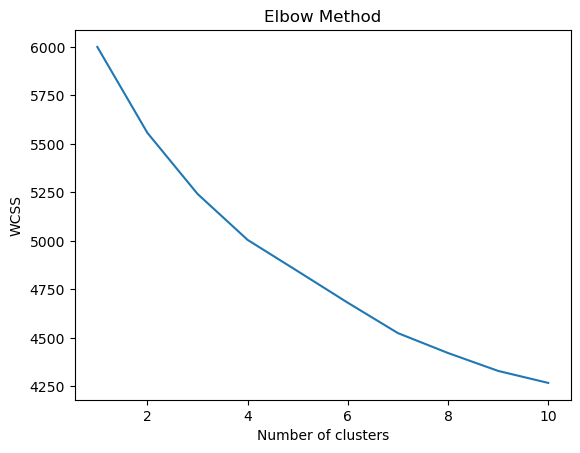

In [196]:
wcss = []
for i in range(1, 11):   #clusters 1-10
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_sc_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [197]:
# Create a DataFrame to display the WCSS values for each number of clusters
wcss_table = pd.DataFrame({
    "Number of Clusters": range(1, 11),
    "WCSS": wcss
})

# Display the table
print(wcss_table)

   Number of Clusters         WCSS
0                   1  6000.000000
1                   2  5556.936404
2                   3  5242.479545
3                   4  5005.393066
4                   5  4844.028032
5                   6  4681.457678
6                   7  4524.945377
7                   8  4422.359464
8                   9  4330.172691
9                  10  4268.248378


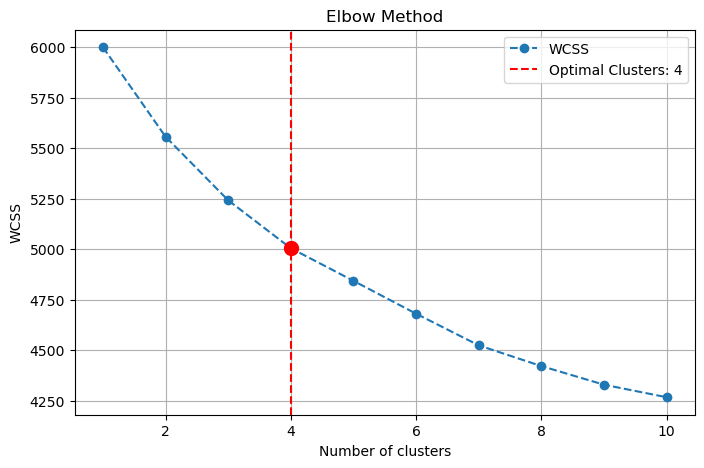

The optimal number of clusters is: 4


In [198]:
# Example WCSS values and cluster numbers
clusters = range(1, 11)

# Automatically find the elbow point using the KneeLocator
knee_locator = KneeLocator(clusters, wcss, curve="convex", direction="decreasing")
optimal_clusters = knee_locator.knee

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(clusters, wcss, marker='o', linestyle='--', label="WCSS")
plt.axvline(optimal_clusters, linestyle='--', color='red', label=f'Optimal Clusters: {optimal_clusters}')
plt.scatter(optimal_clusters, wcss[optimal_clusters-1], c='red', s=100, zorder=5)  # Highlight elbow point
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.legend()
plt.grid(True)
plt.show()

# Print the optimal number of clusters
print(f"The optimal number of clusters is: {optimal_clusters}")

In [199]:
# Fit K-Means to the data with the optimal number of K cluster = 4
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, random_state=0)
clusters = kmeans.fit_predict(df_sc_scaled)

# Add the cluster labels to the DataFrame
df_scaled['KMeans_Cluster'] = clusters

# Show the df
df_scaled.head()

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity,KMeans_Cluster
0,66161.01279,57,0,503,1,41,1968.919899,2517.159284,5813.342700,0.975409,1,0.202693,3
1,78639.20248,60,1,779,2,27,9797.056371,31501.758840,3991.007637,0.945920,2,0.549358,2
2,70207.25321,46,1,519,14,95,7024.173403,16444.341580,6036.140567,0.272664,3,0.842993,0
3,65866.23872,42,1,834,17,77,7992.359261,45233.592940,2691.192862,0.814385,4,0.119473,1
4,56774.10995,36,0,410,12,58,538.691042,48586.582480,10144.073090,0.346523,4,0.990168,0


In [203]:
silhouette_scaled = silhouette_score(df_sc_scaled.select_dtypes(include=['float64', 'int64']), clusters)
print(f"Silhouette Score (scaled): {silhouette_scaled:.4f}")

Silhouette Score (scaled): 0.0678


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_19288\304132749.py:4: UserWarning: 
The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x = "Age", y = "Income", hue=clusters, palette=["blueviolet", "red", "deepskyblue"], data=df_sc_scaled, s = 60)


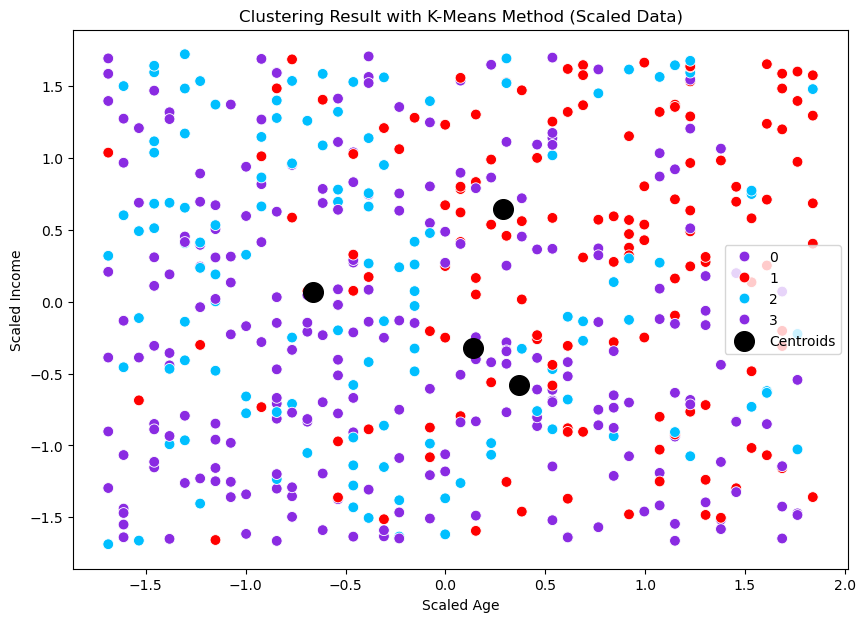

In [137]:
# visualize the result using scater chart on scaled data
plt.figure(figsize=(10,7))

sns.scatterplot(x = "Age", y = "Income", hue=clusters, palette=["blueviolet", "red", "deepskyblue"], data=df_sc_scaled, s = 60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c="black", label="Centroids")
plt.xlabel("Scaled Age")
plt.ylabel("Scaled Income")
plt.title("Clustering Result with K-Means Method (Scaled Data)")
plt.legend()
plt.show()

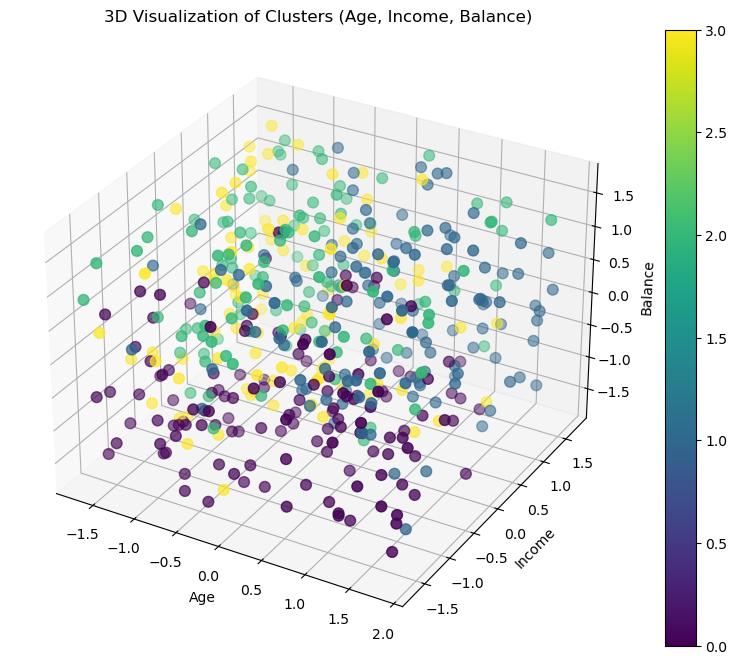

In [121]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Pilih 3 kolom yang ingin divisualisasikan
x_col = 'Age'
y_col = 'Income'
z_col = 'Balance'

# Buat figure 3D
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot 3D berdasarkan cluster
sc = ax.scatter(
    df_sc_scaled[x_col], 
    df_sc_scaled[y_col], 
    df_sc_scaled[z_col],
    c=df_scaled['KMeans_Cluster'], cmap='viridis', s=60
)

# Label dan judul
ax.set_xlabel(x_col)
ax.set_ylabel(y_col)
ax.set_zlabel(z_col)
ax.set_title(f'3D Visualization of Clusters ({x_col}, {y_col}, {z_col})')

# Tambahkan colorbar biar tahu warna tiap cluster
plt.colorbar(sc)
plt.show()


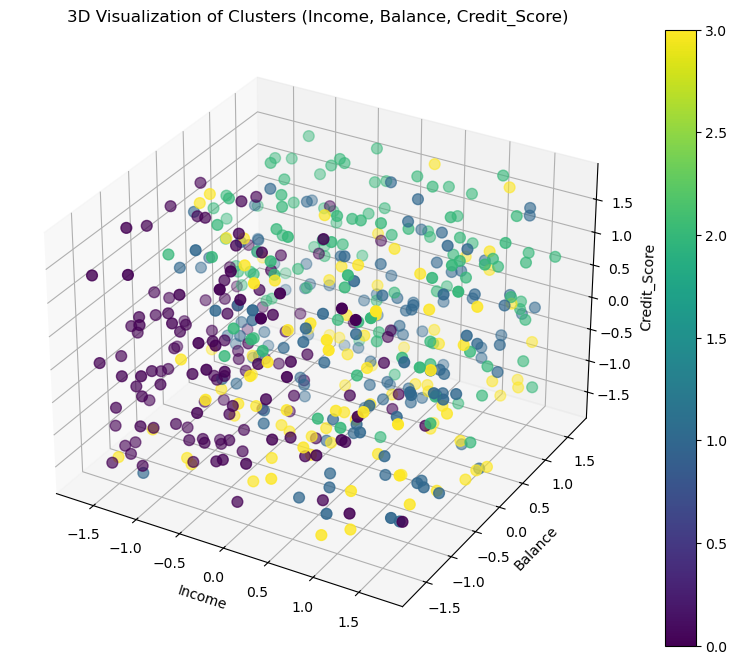

In [138]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Pilih 3 kolom yang ingin divisualisasikan
x_col = 'Income'
y_col = 'Balance'
z_col = 'Credit_Score'

# Buat figure 3D
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot 3D berdasarkan cluster
sc = ax.scatter(
    df_sc_scaled[x_col], 
    df_sc_scaled[y_col], 
    df_sc_scaled[z_col],
    c=df_scaled['KMeans_Cluster'], cmap='viridis', s=60
)

# Label dan judul
ax.set_xlabel(x_col)
ax.set_ylabel(y_col)
ax.set_zlabel(z_col)
ax.set_title(f'3D Visualization of Clusters ({x_col}, {y_col}, {z_col})')

# Tambahkan colorbar biar tahu warna tiap cluster
plt.colorbar(sc)
plt.show()


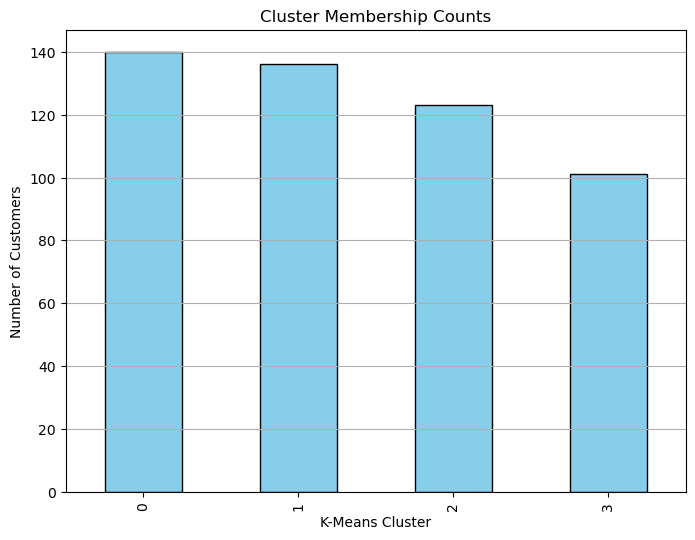

In [117]:
cluster_counts = df_scaled['KMeans_Cluster'].value_counts()

plt.figure(figsize=(8, 6))
cluster_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Cluster Membership Counts')
plt.xlabel('K-Means Cluster')
plt.ylabel('Number of Customers')
plt.grid(axis='y')
plt.show()


In [119]:
# Group the data by cluster and calculate the mean spending and annual income for each cluster
cluster_summary = df_scaled.groupby(clusters).agg({'Income': ['mean', 'min', 'max'],
                                              'Age': ['mean', 'min', 'max'],
                                              'Education': ['first', 'count'],
                                              'Credit_Score': ['mean', 'min', 'max'],
                                              'Years_with_Bank': ['mean', 'min', 'max'],
                                              'Transaction_Count': ['mean', 'min', 'max'],
                                              'Balance': ['mean', 'min', 'max'],
                                              'Loan_Approval_Amount': ['mean', 'min', 'max'],
                                              'Credit_Card_Limit': ['mean', 'min', 'max'],
                                              'Purchase_Frequency': ['mean', 'min', 'max'],
                                              'Customer_Satisfaction': ['mean', 'min', 'max'],
                                              'Online_Activity': ['mean', 'min', 'max']})

cluster_summary = cluster_summary.rename_axis('KMeans_cluster')

cluster_summary

Income                                  Age          \
                        mean          min          max       mean min max   
KMeans_cluster                                                              
0               47729.015309  25857.05940  97597.41750  40.914286  18  63   
1               68533.297675  25992.76433  99128.03785  48.441176  18  64   
2               65233.378412  25352.16071  99913.52549  35.837398  18  64   
3               70258.568150  26924.70385  99580.05922  32.485149  18  58   

               Education       Credit_Score       ... Credit_Card_Limit  \
                   first count         mean  min  ...               max   
KMeans_cluster                                    ...                     
0                      1   140   538.271429  307  ...       19439.32902   
1                      1   136   536.147059  300  ...       19236.71584   
2                      1   123   670.170732  347  ...       19968.52056   
3                      0   101   512.782178  304  ...       19828.57514   

               Purchase_Frequency                     Customer_Satisfaction  \
                             mean       min       max                  mean   
KMeans_cluster                                                                
0                        0.427335  0.001914  0.974452              2.478571   
1                        0.576369  0.011290  0.991562              3.117647   
2                        0.551079  0.019552  0.993942              2.081301   
3                        0.498817  0.000813  0.986368              2.524752   

                       Online_Activity                      
               min max            mean       min       max  
KMeans_cluster                                              
0                1   4        0.691544  0.041645  0.999897  
1                1   4        0.384065  0.001432  0.996199  
2                1   4        0.473038  0.002706  0.999120  
3                1   4        0.396292  0.001320  0.985654  

[4 rows x 35 columns]

['Bachelor' 'High School' 'Master' 'PhD']

# INSIGHT

Cluster 0 – Middle-Income, Moderate Satisfaction, Active Online
- Rata-rata pendapatan (Income): 47,7 ribu
- Rata-rata umur (Age): 41 tahun
- Education: High School
- Credit Score: 538 (cukup rendah, mungkin pengguna kredit pemula atau moderat)
- Purchase Frequency: 0.43 → cukup jarang berbelanja
- Customer Satisfaction: 2.48 (cukup puas)
- Online Activity: 0.69 (cukup tinggi aktivitas online)

Interpretasi:
Kelompok ini terdiri dari pelanggan berpenghasilan menengah dan cukup aktif secara online, dengan tingkat kepuasan sedang. Mereka kemungkinan masih bisa ditingkatkan loyalitasnyalewat program digital seperti online rewards atau personalized offers

Cluster 1 – High-Income, Mature, Loyal & Satisfied
- Income:68,5 ribu (tertinggi kedua)
- Age: 48 tahun (tertua)
- Education: High School
- Credit Score: 536
- Purchase Frequency: 0.58 (paling tinggi)
- Customer Satisfaction: 3.12 (tertinggi)
- Online Activity: 0.38 (cukup rendah)

Interpretasi:
Pelanggan ini berpenghasilan tinggi, lebih tua, dan paling puas terhadap layanan. Mereka jarang aktif online, mungkin lebih loyal ke brand secara tradisional (offline).
→ Cocok ditargetkan dengan program eksklusif, loyalty membership, atau diskon premium


Cluster 2 – Young Professionals, High Credit & Online Users
- Income: 65,2 ribu
- Age: 36 tahun
- Education: High School
- Credit Score: 670 (tertinggi)
- Purchase Frequency: 0.55 (tinggi)
- Customer Satisfaction: 2.08 (terendah)
- Online Activity: 0.47 (cukup aktif)

Interpretasi:
Ini kelompok profesional muda dengan skor kredit bagus, penghasilan stabil, dan cukup aktif online, tapi kepuasan rendah. → Kemungkinan mereka menuntut kualitas layanan lebih tinggi atau harga lebih kompetitif
Bisa ditingkatkan dengan UX/UI online yang lebih baik, program cashback, atau fast delivery.


Cluster 3 – Youngest & Low Income, Price-Sensitive

- Income: 70,2 ribu (tertinggi), tapi lihat Credit Score dan Age
- Age: 32 tahun (termuda)
- Education: Bachelor
- Credit Score: 512 (terendah)
- Purchase Frequency: 0.49
- Customer Satisfaction: 2.52 (cukup puas)
- Online Activity: 0.39

Interpretasi:
Segmen ini muda dan impulsif, dengan pendapatan tinggi tapi kredit rendah, artinya mungkin baru mulai menggunakan fasilitas kredit atau kurang stabil secara finansial.
→ Cocok untuk produk entry-level premium, promosi cicilan, atau edukasi finansial.


# GAPAKE SCALED

In [173]:
# create new dataframe that consist only annual income and spending score
df_noscaled = df[['Income', 'Age', 'Education', 'Credit_Score', 'Years_with_Bank', 'Transaction_Count', 'Balance', 'Loan_Approval_Amount', 'Credit_Card_Limit', 'Purchase_Frequency', 'Customer_Satisfaction', 'Online_Activity']]
df_noscaled.head()

,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity
0,66161.01279,57,0,503,1,41,1968.919899,2517.159284,5813.342700,0.975409,1,0.202693
1,78639.20248,60,1,779,2,27,9797.056371,31501.758840,3991.007637,0.945920,2,0.549358
2,70207.25321,46,1,519,14,95,7024.173403,16444.341580,6036.140567,0.272664,3,0.842993
3,65866.23872,42,1,834,17,77,7992.359261,45233.592940,2691.192862,0.814385,4,0.119473
4,56774.10995,36,0,410,12,58,538.691042,48586.582480,10144.073090,0.346523,4,0.990168


In [174]:
from sklearn.cluster import KMeans

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Wi

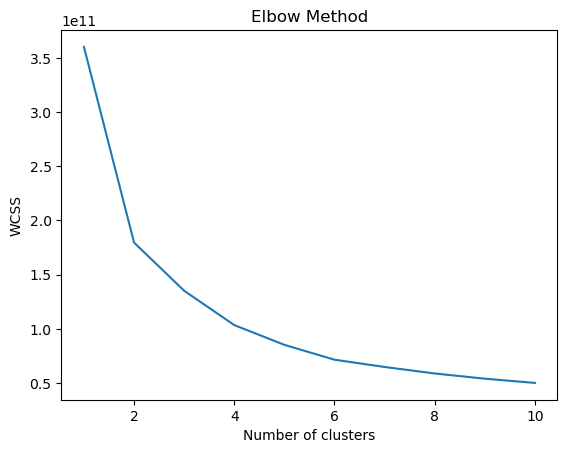

In [175]:
wcss = []
for i in range(1, 11):   #clusters 1-10
    kmeans_non = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans_non.fit(df_noscaled)
    wcss.append(kmeans_non.inertia_)

# Plot the elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [176]:
# Create a DataFrame to display the WCSS values for each number of clusters
wcss_table = pd.DataFrame({
    "Number of Clusters": range(1, 11),
    "WCSS": wcss
})

# Display the table
print(wcss_table)

   Number of Clusters          WCSS
0                   1  3.601357e+11
1                   2  1.796223e+11
2                   3  1.351798e+11
3                   4  1.034966e+11
4                   5  8.526114e+10
5                   6  7.154790e+10
6                   7  6.483984e+10
7                   8  5.884440e+10
8                   9  5.402805e+10
9                  10  5.012191e+10


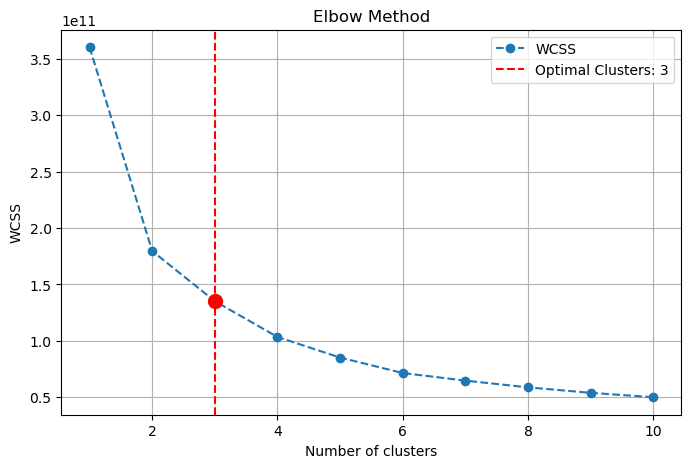

The optimal number of clusters is: 3


In [177]:
# Example WCSS values and cluster numbers
clusters = range(1, 11)

# Automatically find the elbow point using the KneeLocator
knee_locator = KneeLocator(clusters, wcss, curve="convex", direction="decreasing")
optimal_clusters = knee_locator.knee

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(clusters, wcss, marker='o', linestyle='--', label="WCSS")
plt.axvline(optimal_clusters, linestyle='--', color='red', label=f'Optimal Clusters: {optimal_clusters}')
plt.scatter(optimal_clusters, wcss[optimal_clusters-1], c='red', s=100, zorder=5)  # Highlight elbow point
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.legend()
plt.grid(True)
plt.show()

# Print the optimal number of clusters
print(f"The optimal number of clusters is: {optimal_clusters}")

In [178]:
# Fit K-Means to the data with the optimal number of K cluster = 3
kmeans_non = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
clusters_non = kmeans_non.fit_predict(df_noscaled)

# Add the cluster labels to the DataFrame
df_noscaled['KMeans_Cluster'] = clusters_non

# Show the df
df_noscaled.head()

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity,KMeans_Cluster
0,66161.01279,57,0,503,1,41,1968.919899,2517.159284,5813.342700,0.975409,1,0.202693,2
1,78639.20248,60,1,779,2,27,9797.056371,31501.758840,3991.007637,0.945920,2,0.549358,1
2,70207.25321,46,1,519,14,95,7024.173403,16444.341580,6036.140567,0.272664,3,0.842993,2
3,65866.23872,42,1,834,17,77,7992.359261,45233.592940,2691.192862,0.814385,4,0.119473,1
4,56774.10995,36,0,410,12,58,538.691042,48586.582480,10144.073090,0.346523,4,0.990168,1


In [179]:
silhouette_non_scaled = silhouette_score(df_noscaled.select_dtypes(include=['float64', 'int64']), clusters_non)
print(f"Silhouette Score (Non-scaled): {silhouette_non_scaled:.4f}")

# silhoutte score non scaled lebih baik daripada scaled.

Silhouette Score (Non-scaled): 0.3475


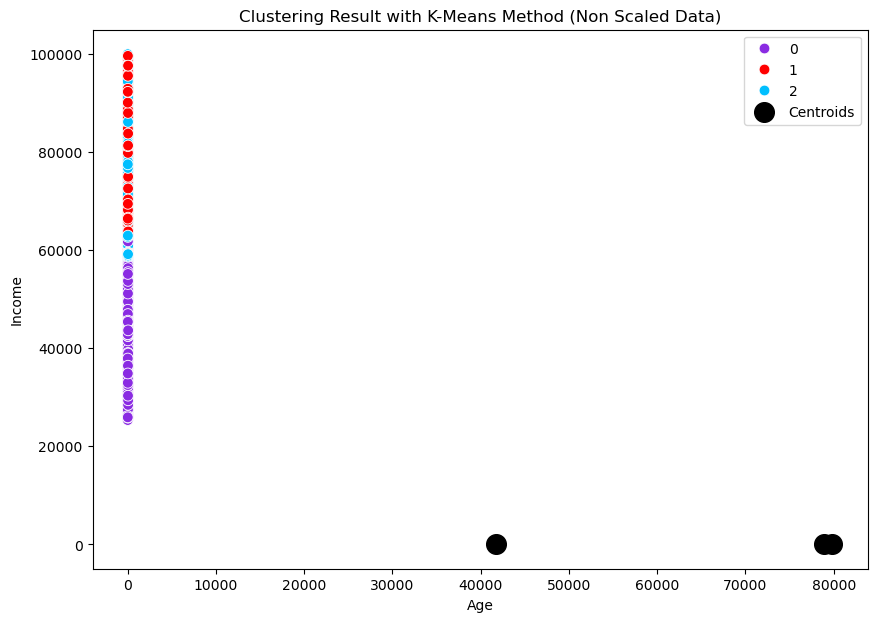

In [206]:
# visualize the result using scater chart on scaled data
plt.figure(figsize=(10,7))

sns.scatterplot(x = "Age", y = "Income", hue=clusters_non, palette=["blueviolet", "red", "deepskyblue"], data=df_noscaled, s = 60)
plt.scatter(kmeans_non.cluster_centers_[:, 0], kmeans_non.cluster_centers_[:, 1], s=200, c="black", label="Centroids")
plt.xlabel("Age")
plt.ylabel("Income")
plt.title("Clustering Result with K-Means Method (Non Scaled Data)")
plt.legend()
plt.show()

gabisa liat sebarannya soalnya age hanya rentang puluhan. sedangkan income rentang ribuan

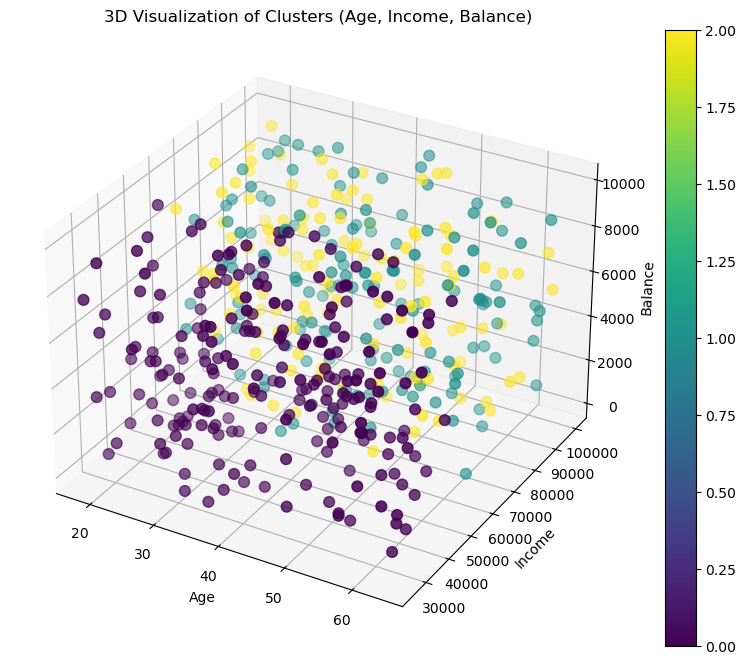

In [181]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Pilih 3 kolom yang ingin divisualisasikan
x_col = 'Age'
y_col = 'Income'
z_col = 'Balance'

# Buat figure 3D
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot 3D berdasarkan cluster
sc = ax.scatter(
    df_noscaled[x_col], 
    df_noscaled[y_col], 
    df_noscaled[z_col],
    c=df_noscaled['KMeans_Cluster'], cmap='viridis', s=60
)

# Label dan judul
ax.set_xlabel(x_col)
ax.set_ylabel(y_col)
ax.set_zlabel(z_col)
ax.set_title(f'3D Visualization of Clusters ({x_col}, {y_col}, {z_col})')

# Tambahkan colorbar biar tahu warna tiap cluster
plt.colorbar(sc)
plt.show()


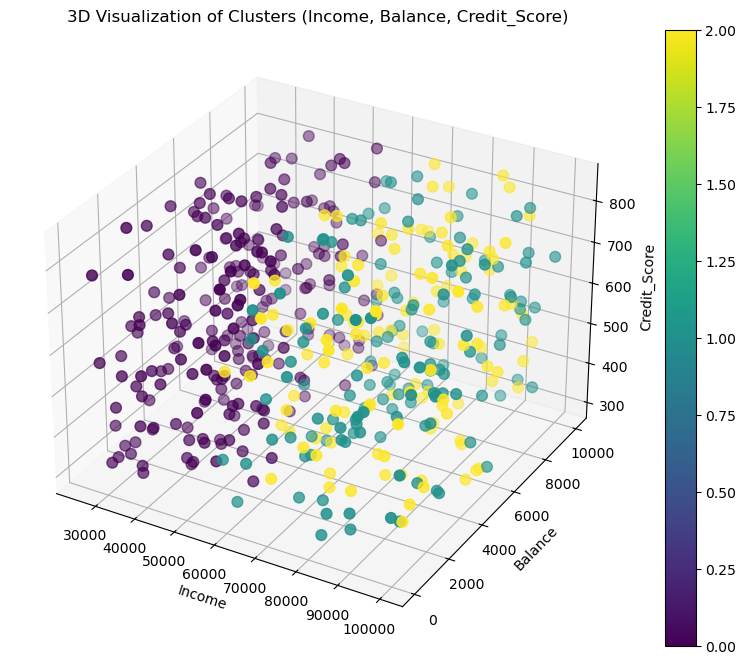

In [182]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Pilih 3 kolom yang ingin divisualisasikan
x_col = 'Income'
y_col = 'Balance'
z_col = 'Credit_Score'

# Buat figure 3D
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot 3D berdasarkan cluster
sc = ax.scatter(
    df_noscaled[x_col], 
    df_noscaled[y_col], 
    df_noscaled[z_col],
    c=df_noscaled['KMeans_Cluster'], cmap='viridis', s=60
)

# Label dan judul
ax.set_xlabel(x_col)
ax.set_ylabel(y_col)
ax.set_zlabel(z_col)
ax.set_title(f'3D Visualization of Clusters ({x_col}, {y_col}, {z_col})')

# Tambahkan colorbar biar tahu warna tiap cluster
plt.colorbar(sc)
plt.show()


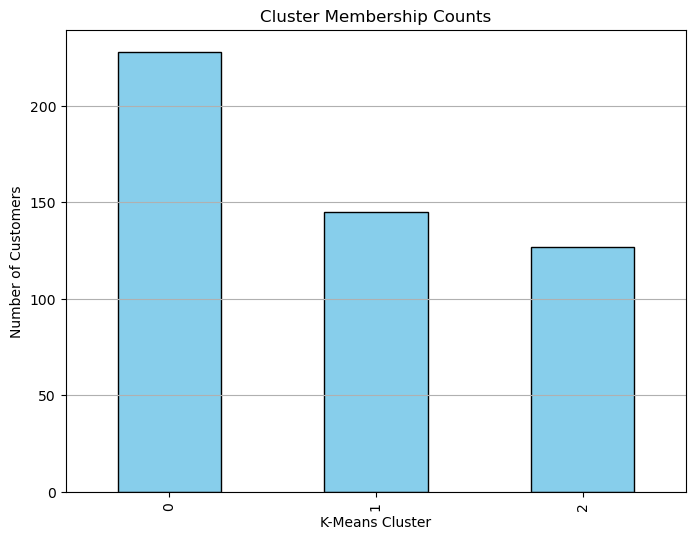

In [183]:
cluster_counts = df_noscaled['KMeans_Cluster'].value_counts()

plt.figure(figsize=(8, 6))
cluster_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Cluster Membership Counts')
plt.xlabel('K-Means Cluster')
plt.ylabel('Number of Customers')
plt.grid(axis='y')
plt.show()


In [185]:
# Group the data by cluster and calculate the mean spending and annual income for each cluster
cluster_summary = df_noscaled.groupby(clusters_non).agg({'Income': ['mean', 'min', 'max'],
                                              'Age': ['mean', 'min', 'max'],
                                              'Education': ['first', 'count'],
                                              'Credit_Score': ['mean', 'min', 'max'],
                                              'Years_with_Bank': ['mean', 'min', 'max'],
                                              'Transaction_Count': ['mean', 'min', 'max'],
                                              'Balance': ['mean', 'min', 'max'],
                                              'Loan_Approval_Amount': ['mean', 'min', 'max'],
                                              'Credit_Card_Limit': ['mean', 'min', 'max'],
                                              'Purchase_Frequency': ['mean', 'min', 'max'],
                                              'Customer_Satisfaction': ['mean', 'min', 'max'],
                                              'Online_Activity': ['mean', 'min', 'max']})

cluster_summary = cluster_summary.rename_axis('KMeans_cluster')

cluster_summary

Income                                  Age          \
                        mean          min          max       mean min max   
KMeans_cluster                                                              
0               41785.918734  25352.16071  61772.90099  39.973684  18  64   
1               79841.469843  56774.10995  99580.05922  41.193103  18  64   
2               78883.535088  54737.93056  99913.52549  38.724409  18  64   

               Education       Credit_Score       ... Credit_Card_Limit  \
                   first count         mean  min  ...               max   
KMeans_cluster                                    ...                     
0                      0   228   563.355263  302  ...       19968.52056   
1                      1   145   560.434483  306  ...       19557.51089   
2                      0   127   573.133858  300  ...       19659.11871   

               Purchase_Frequency                     Customer_Satisfaction  \
                             mean       min       max                  mean   
KMeans_cluster                                                                
0                        0.512556  0.001914  0.988192              2.539474   
1                        0.517569  0.000813  0.993942              2.593103   
2                        0.507607  0.005398  0.991089              2.574803   

                       Online_Activity                      
               min max            mean       min       max  
KMeans_cluster                                              
0                1   4        0.525803  0.001432  0.999897  
1                1   4        0.474545  0.006100  0.994023  
2                1   4        0.461151  0.001320  0.996199  

[3 rows x 35 columns]

['Bachelor' 'High School' 'Master' 'PhD']

Cluster 0 – Middle Income, Younger, Moderate Satisfaction
- Income: Terendah (~41K)
- Age: 40 tahun rata-
- Education: Bachelor
- Credit Score: 563 (cukup baik)
- Purchase Frequency: 0.51 (rata-rata)
- Customer Satisfaction: 2.54 (cukup puas)
- Online Activity: 0.53 (paling tinggi di antara 3 cluster)

Interpretasi:
Kelompok ini berisi pelanggan berpenghasilan menengah dan cukup aktif online, mungkin segmen digital-savvy millennials.
Mereka memiliki kepuasan yang cukup, tapi belum sepenuhnya loyal.

Strategi:
- Tingkatkan customer experience berbasis digital (aplikasi mobile, promo online).
- Gunakan gamification atau reward system untuk mempertahankan engagement.


Cluster 1 – High-Income, Slightly Older, Loyal Segment
- Income: Tertinggi (~79.8K)
- Age: 41 tahun
- Education: High School
- Credit Score: 560 (cukup stabil)
- Purchase Frequency: 0.52
- Customer Satisfaction: 2.59 (paling tinggi)
- Online Activity: 0.47 (cukup rendah)

Interpretasi:
Kelompok ini adalah pelanggan berpenghasilan tinggi dan relatif stabil, cenderung lebih puas dan loyal, meskipun kurang aktif secara online.
Kemungkinan mereka adalah pelanggan mapan atau senior users yang sudah percaya pada brand.

Strategi:
- Pertahankan dengan exclusive loyalty programs, premium customer support, dan personalized offers.
- Dapat diarahkan ke program cross-selling karena daya beli tinggi.

Cluster 2 – High-Income, Younger, Low Online Engagement
- Income: Hampir sama tinggi dengan cluster 1 (~78.8K)
- Age: Termuda (rata-rata 38.7 tahun)
- Education: Bachelor
- Credit Score: 573 (terbaik)
- Purchase Frequency: 0.51
- Customer Satisfaction: 2.57
- Online Activity: 0.46 (paling rendah)

Interpretasi:
Pelanggan ini berpenghasilan tinggi dan skor kredit kuat, namun aktivitas online rendah dan kepuasan tidak setinggi yang diharapkan.
Mereka bisa jadi profesional muda sibuk yang jarang interaksi langsung dengan platform.

Strategi:
- Tawarkan fitur otomatisasi layanan (autopay, reminder, fast transaction).
- Gunakan email marketing atau in-app notification untuk meningkatkan interaksi.
- Fokus pada convenience dan time-saving features.


Silhouette Score (Non-scaled): 0.3475

Silhouette Score (scaled): 0.0678

Non Scaled better dapat dilihat dari nilai Silhouette yang lebih tinggi. Ini menandakan data asli sudah menunjukkan pemisahan cluster yang seimbang dan jauh lebih baik. Artinya, dalam dataset ini, nilai-nilai asli antar fitur sudah dalam skala yang seimbang secara alami, sehingga tidak perlu distandarkan.

KMeans sangat bergantung pada jarak euclidean untuk menentukan cluster, sehingga perbedaan skala antar variabel akan mempengaruhi hasil. Kalau fitur memiliki skala yg berbeda besar (misal ribuan dan ratusan) maka perlu di scale.
Tapi jika semua fitur sudah dalam skala yang mirip, scaling dapat menghilangkan perbedaan / variasi alami antar fitur